# Introduction

Dataset can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

The column names are contained in the following file https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

The original paper which published the dataset can be found here http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf

The census from which the dataset was built https://www2.census.gov/library/publications/decennial/1970/phc-1/39204513p3ch05.pdf

# Describe

In [1]:
# Import package that will enable opening of names file from url
from urllib.request import urlopen

# Open the names file and assign it to data
data = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names")

# Adapted from https://bugs.python.org/issue5419
# Decode the content of the names file and print the output
print(data.read().decode('utf-8'))

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [2]:
# Importing pandas
import pandas as pd

# Reading the tab-delimited dataset into a DataFile and adding column names from the housing.names file shown above
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

# Viewing the first five rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualising the dataset

### Scatter plots

The MEDV is the variable that we will be trying to predict using the keras machine learning library.

From the scatter plot below, there appears to be a negative correlation with house prices and the following: CRIM, INDUS, NOX, LSTAT, PTRATIO and possibly TAX.

There appears to be a positive correlation between house prices and RM

In [3]:
# Adapted from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
import matplotlib.pyplot as plt

plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 16))
fig.subplots_adjust(wspace=.2, hspace=.4)
img_index = 0

rows, cols = df.shape

for i in range(cols - 1):
    row, col = i // 3, i % 3
    axes[row][col].scatter(df.iloc[:, i], df.loc[:, "MEDV"], alpha=0.5, s=10)
    axes[row][col].set_title(df.columns[i] + ' and MEDV')
    axes[row][col].set_xlabel(df.columns[i])        
    axes[row][col].set_ylabel('MEDV')
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1600 with 15 Axes>

### Creating a correlation heat map

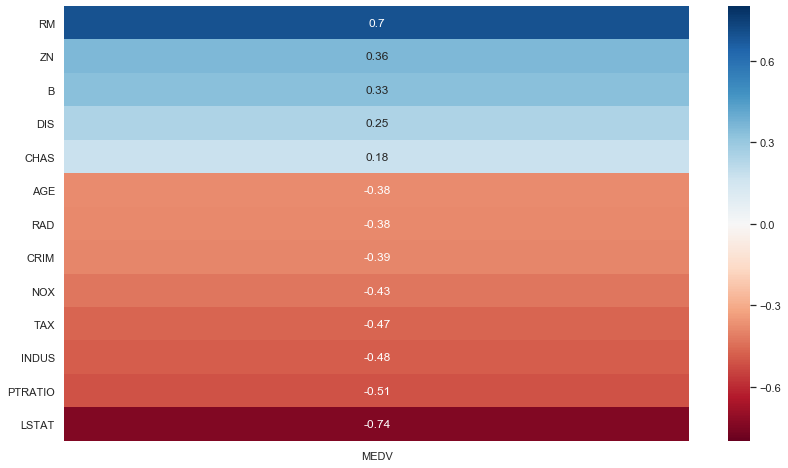

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix
corr = df.corr()

# Reducing the correlation matrix to a single column, and 12 rows (not showing MEDV vs MEDV)
corr = pd.DataFrame(corr["MEDV"][0:13])

# Setting the size of the heat map
sns.set(rc={'figure.figsize':(14,8)})

# Sorting corr in descending order
corrSorted = corr.sort_values(by=["MEDV"], ascending=False)

# Creating the correlation heatmap
sns.heatmap(corrSorted, annot=True, cmap='RdBu', vmin=-0.8, vmax=0.8)


# From https://github.com/mwaskom/seaborn/issues/1773
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values


# Showing the heatmap
plt.show()

### Deciding which variables to look at

From the above the variables that strongly correlate with MEDV (either positively or negatively) are LSTAT (-0.74),PTRATIO (-0.51) and RM (0.70). These are the variables that I will use later on to build a prediction model to predict the median house price. I will also look at CHAS as the next section looks at using inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not.

### Summary statistics

In [5]:
df2 = df[["MEDV", "PTRATIO", "RM", "INDUS", "CHAS"]]

df2.describe()

,MEDV,PTRATIO,RM,INDUS,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,18.455534,6.284634,11.136779,0.069170
std,9.197104,2.164946,0.702617,6.860353,0.253994
min,5.000000,12.600000,3.561000,0.460000,0.000000
25%,17.025000,17.400000,5.885500,5.190000,0.000000
50%,21.200000,19.050000,6.208500,9.690000,0.000000
75%,25.000000,20.200000,6.623500,18.100000,0.000000
max,50.000000,22.000000,8.780000,27.740000,1.000000


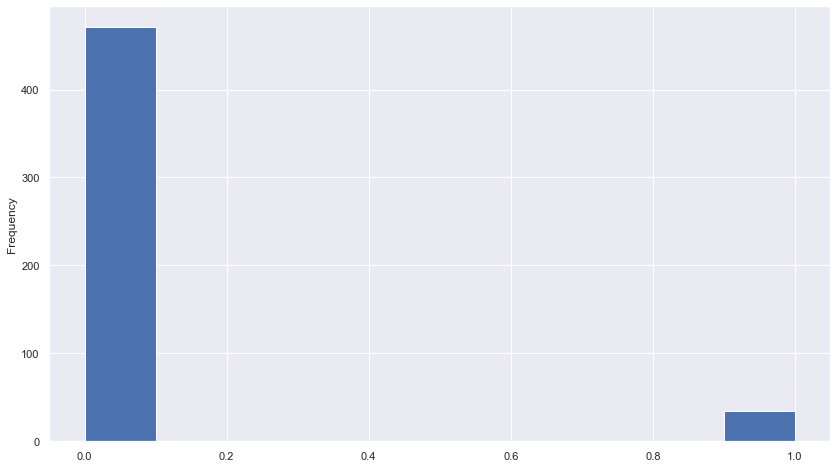

In [6]:
# Displaying the frequency of houses that are on/not on Charles river
df2["CHAS"].plot.hist()

## Inferential Statistics

We are interested in determining if there is a significant difference in house prices between houses that are along the Charles River and those that aren't. The Boston House Prices dataset does not contain the data for the entire population of houses in Boston but instead contains a sample which are the median values for each town. We can use inferential statistics to make inferences about the population from the sample data [towardsdatascience-Inferential Statistics for Data Science](https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a). Inferential statistics can be used to determine the probability that there is a true relationship between two variables [Science Direct-Inferential Statistics](https://www.sciencedirect.com/topics/medicine-and-dentistry/inferential-statistics).  

### Selecting an appropriate test



#### Requirements for a Student t-test

Before conducting a t-test we will first examine if doing a t-test in this case is appropriate. 

(need reference to list of requirements for t-test)


MEDV distribution for tracts along Charles River and MEDV distribution for tracts not along Charles River.

As the two CHAS variables are independent of each other then an independent t-test should be used as apposed to .....

There will be only one comparison made: MEDV for CHAS = 0 and MEDV for CHAS = 1. As there is only one comparison to be made an ANOVA isn't necessary in this case and a t-test will be sufficient.


...........

Unequal sample sizes and different variances, therefore Student t-test is not appropriate

#### Requirements for a Welch t-test
Welch test can be used in place of the student t-test where the variance and/or sample sizes differ.


However, as seen below the distributions are not normal which is also a requirement for the Welch test **give reference**

#### Non-Parametric Data

As the data is not normally distributed a non-parametric test should be used. [University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests). The Mann-Whitney U test (or Wilcoxon rank-sum test) can be used for non-para-metric data to test for the difference between two independent variables.[University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests)


#### Visualising the data to determine if they are normally distributed

In [7]:
# Importing seaborn to create distplots
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


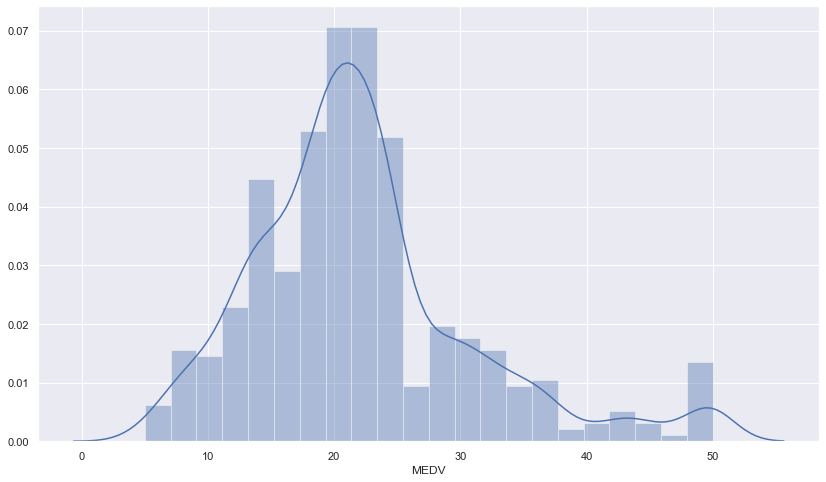

In [8]:
# Displot for tract not along Charles River
sns.distplot(df["MEDV"][df["CHAS"] == 0])

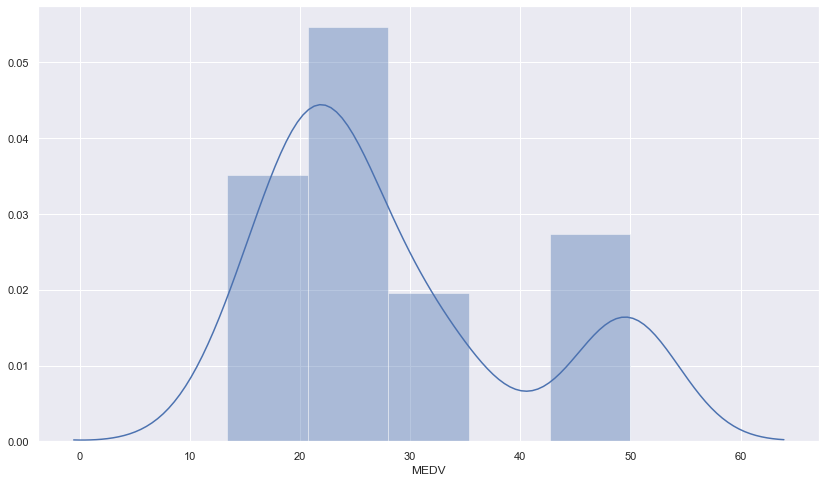

In [9]:
# Displot for tract along Charles River
sns.distplot(df["MEDV"][df["CHAS"] == 1])

In [10]:
# Importing stats module from scipy
from scipy import stats

# Determining if the distribution for tracts along Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 1])

(0.8359232544898987, 0.00011230883683310822)

In [11]:
# Determining if the distribution for tracts not along the Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 0])

(0.9282605051994324, 3.113930960958397e-14)

In [12]:
# Determining the mean for both groups
df["MEDV"].groupby(df["CHAS"]).mean()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

In [13]:
# Determining the count for both groups
df["MEDV"].groupby(df["CHAS"]).count()

CHAS
0    471
1     35
Name: MEDV, dtype: int64

In [14]:
# Determining the variance for both groups
df["MEDV"].groupby(df["CHAS"]).var()

CHAS
0     77.992962
1    139.633059
Name: MEDV, dtype: float64

In [15]:
# Determining the standard deviation for both groups
df["MEDV"].groupby(df["CHAS"]).std()

CHAS
0     8.831362
1    11.816643
Name: MEDV, dtype: float64

### Student t-test

The p-value for the Student t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [16]:
# Code for Student t-test

from scipy.stats import ttest_ind as tti

stti_stat, stti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=True)

stti_p

7.390623170519905e-05

### Welch t-test

The p-value for the Welch t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [17]:
# Code for Welch t-test

from scipy.stats import ttest_ind as tti

wtti_stat, wtti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=False)

wtti_p

0.003567170098137517

### Mann-Whitney U test 

The p-value for the Mann-Whitney U test is less than 0.05 which strongly suggests that the sample distributions are different.

In [18]:
# Code for Mann-Whitney U test

from scipy.stats import mannwhitneyu as mwu

mwu(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1])

MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)

### Hypothesis testing

## Predict

This is a regression predictive modeling problem. Regression predictive modeling problems involve predicting a real-valued quantity [machinelearningmastery - How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

### Preparing the data for the neural network

Creating separate columns for true and false values for CHAS

In [19]:
import numpy as np


# Adapted from course materials
df["CHAS_True"] = df["CHAS"]
df["CHAS_False"] = (df["CHAS"] == 0).astype(np.int)

Separating the data into the independent variables 'PTRATIO', 'RM' and 'INDUS' and the target variable 'MEDV'

In [20]:
# Input/independent variables

X = df.drop(columns=["MEDV", "CHAS"])#X = df[["PTRATIO", "RM", "INDUS"]]

# Output/dependent variable

y = df["MEDV"]

In [21]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0,1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0,1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0,1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0,1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0,1


In [22]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

#### Splitting datasets into random train and test subsets

Setting the test size to 33% of the dataset

In [23]:
# Importing train test split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the output and input datasets into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
X_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
246,0.33983,22.0,5.86,0.431,6.108,34.9,8.0555,7,330.0,19.1,390.18,9.16,0,1
483,2.81838,0.0,18.10,0.532,5.762,40.3,4.0983,24,666.0,20.2,392.92,10.42,0,1
424,8.79212,0.0,18.10,0.584,5.565,70.6,2.0635,24,666.0,20.2,3.65,17.16,0,1
25,0.84054,0.0,8.14,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,0,1
186,0.05602,0.0,2.46,0.488,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.06466,70.0,2.24,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97,0,1
87,0.07151,0.0,4.49,0.449,6.121,56.8,3.7476,3,247.0,18.5,395.15,8.44,0,1
315,0.25356,0.0,9.90,0.544,5.705,77.7,3.9450,4,304.0,18.4,396.42,11.50,0,1
309,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4,304.0,18.4,396.24,9.97,0,1


In [25]:
X_test

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
405,67.92080,0.0,18.10,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,0,1
374,18.49820,0.0,18.10,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,0,1
445,10.67180,0.0,18.10,0.740,6.459,94.8,1.9879,24,666.0,20.2,43.06,23.98,0,1
145,2.37934,0.0,19.58,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,0,1
344,0.03049,55.0,3.78,0.484,6.874,28.1,6.4654,5,370.0,17.6,387.97,4.61,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.22212,0.0,10.01,0.547,6.092,95.4,2.5480,6,432.0,17.8,396.90,17.09,0,1
201,0.03445,82.5,2.03,0.415,6.162,38.4,6.2700,2,348.0,14.7,393.77,7.43,0,1
290,0.03502,80.0,4.95,0.411,6.861,27.9,5.1167,4,245.0,19.2,396.90,3.33,0,1
149,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5,403.0,14.7,351.85,21.45,0,1


In [26]:
y_train

246    24.3
483    21.8
424    11.7
25     13.9
186    50.0
       ... 
298    22.5
87     22.2
315    16.2
309    20.3
363    16.8
Name: MEDV, Length: 339, dtype: float64

In [27]:
y_test

405     5.0
374    13.8
445    11.8
145    13.8
344    31.2
       ... 
113    18.7
201    24.1
290    28.5
149    15.4
293    23.9
Name: MEDV, Length: 167, dtype: float64

### Defining the neural net

There are 3 input variables so the input_dim below is set to 3. Experimenting with 1.5 times more hidden nodes in the first layer compared to the input layer. Second hidden layer has the same number of nodes (4) as the input layer. All layers are using the ReLU activation function. **(Why and explanation of ReLU)**

In [28]:
# Adapted from https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# Importing packages
from keras.models import Sequential
from keras.layers import Dense

# Defining the neural network
model = Sequential()
model.add(Dense(28, input_dim=14, activation='elu'))
model.add(Dense(14, activation='elu'))
model.add(Dense(1, activation='elu'))


Using TensorFlow backend.


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


### Compiling the neural net

As this is a regression problem, a Regression Loss Function will be used. Initially setting this to a Mean Squared Error Loss fuction.

In [30]:
# Compiling the neural net
model.compile(loss='mean_squared_error', optimizer='adam')

### Fitting the neural net to the training dataset

In [31]:
# Fitting the neural net

model.fit(X_train.values, y_train.values, epochs=1500, batch_size=8)

Epoch 1/1500
339/339 [==============================] - 2s 7ms/step - loss: 468.0944
Epoch 2/1500
339/339 [==============================] - 0s 339us/step - loss: 209.3048
Epoch 3/1500
339/339 [==============================] - 0s 366us/step - loss: 161.7036
Epoch 4/1500
339/339 [==============================] - 0s 351us/step - loss: 99.7139
Epoch 5/1500
339/339 [==============================] - 0s 345us/step - loss: 68.3653
Epoch 6/1500
339/339 [==============================] - 0s 304us/step - loss: 62.7745
Epoch 7/1500
339/339 [==============================] - 0s 377us/step - loss: 57.6176
Epoch 8/1500
339/339 [==============================] - 0s 469us/step - loss: 57.0560
Epoch 9/1500
339/339 [==============================] - 0s 336us/step - loss: 59.2243
Epoch 10/1500
339/339 [==============================] - 0s 313us/step - loss: 55.8625
Epoch 11/1500
339/339 [==============================] - 0s 298us/step - loss: 54.0403
Epoch 12/1500
339/339 [============================

339/339 [==============================] - 0s 277us/step - loss: 23.7387
Epoch 95/1500
339/339 [==============================] - 0s 274us/step - loss: 23.2034
Epoch 96/1500
339/339 [==============================] - 0s 277us/step - loss: 22.2539
Epoch 97/1500
339/339 [==============================] - 0s 283us/step - loss: 22.9637
Epoch 98/1500
339/339 [==============================] - 0s 271us/step - loss: 22.2825
Epoch 99/1500
339/339 [==============================] - 0s 289us/step - loss: 21.6755
Epoch 100/1500
339/339 [==============================] - 0s 318us/step - loss: 23.4310
Epoch 101/1500
339/339 [==============================] - 0s 330us/step - loss: 22.5913
Epoch 102/1500
339/339 [==============================] - 0s 277us/step - loss: 21.1851
Epoch 103/1500
339/339 [==============================] - 0s 265us/step - loss: 20.2162
Epoch 104/1500
339/339 [==============================] - 0s 310us/step - loss: 20.3895
Epoch 105/1500
339/339 [============================

339/339 [==============================] - 0s 242us/step - loss: 18.9300
Epoch 188/1500
339/339 [==============================] - 0s 245us/step - loss: 20.2091
Epoch 189/1500
339/339 [==============================] - 0s 242us/step - loss: 20.7625
Epoch 190/1500
339/339 [==============================] - 0s 239us/step - loss: 19.1659
Epoch 191/1500
339/339 [==============================] - 0s 230us/step - loss: 17.4166
Epoch 192/1500
339/339 [==============================] - 0s 230us/step - loss: 16.9353
Epoch 193/1500
339/339 [==============================] - 0s 236us/step - loss: 17.0241
Epoch 194/1500
339/339 [==============================] - 0s 236us/step - loss: 17.0720
Epoch 195/1500
339/339 [==============================] - 0s 236us/step - loss: 19.0753
Epoch 196/1500
339/339 [==============================] - 0s 236us/step - loss: 22.2320
Epoch 197/1500
339/339 [==============================] - 0s 233us/step - loss: 20.4607
Epoch 198/1500
339/339 [=======================

Epoch 280/1500
339/339 [==============================] - 0s 315us/step - loss: 15.6399
Epoch 281/1500
339/339 [==============================] - 0s 256us/step - loss: 12.9389
Epoch 282/1500
339/339 [==============================] - 0s 254us/step - loss: 14.0311
Epoch 283/1500
339/339 [==============================] - 0s 265us/step - loss: 13.1179
Epoch 284/1500
339/339 [==============================] - 0s 242us/step - loss: 13.5802
Epoch 285/1500
339/339 [==============================] - ETA: 0s - loss: 17.11 - 0s 265us/step - loss: 14.9664
Epoch 286/1500
339/339 [==============================] - 0s 242us/step - loss: 14.1866
Epoch 287/1500
339/339 [==============================] - 0s 251us/step - loss: 13.0559
Epoch 288/1500
339/339 [==============================] - 0s 289us/step - loss: 12.8921
Epoch 289/1500
339/339 [==============================] - 0s 313us/step - loss: 14.2568
Epoch 290/1500
339/339 [==============================] - 0s 298us/step - loss: 12.7264
Epoch 29

339/339 [==============================] - 0s 271us/step - loss: 11.9035
Epoch 373/1500
339/339 [==============================] - 0s 295us/step - loss: 12.5841
Epoch 374/1500
339/339 [==============================] - 0s 274us/step - loss: 10.8440
Epoch 375/1500
339/339 [==============================] - 0s 254us/step - loss: 10.2766
Epoch 376/1500
339/339 [==============================] - 0s 242us/step - loss: 11.0815
Epoch 377/1500
339/339 [==============================] - 0s 248us/step - loss: 11.1584
Epoch 378/1500
339/339 [==============================] - 0s 262us/step - loss: 10.5816
Epoch 379/1500
339/339 [==============================] - 0s 256us/step - loss: 11.6911
Epoch 380/1500
339/339 [==============================] - 0s 292us/step - loss: 9.8678
Epoch 381/1500
339/339 [==============================] - 0s 292us/step - loss: 11.4820
Epoch 382/1500
339/339 [==============================] - 0s 262us/step - loss: 10.9767
Epoch 383/1500
339/339 [========================

339/339 [==============================] - 0s 295us/step - loss: 10.2266
Epoch 466/1500
339/339 [==============================] - 0s 292us/step - loss: 8.9265
Epoch 467/1500
339/339 [==============================] - 0s 307us/step - loss: 10.3063
Epoch 468/1500
339/339 [==============================] - 0s 348us/step - loss: 9.6407
Epoch 469/1500
339/339 [==============================] - 0s 348us/step - loss: 9.3721
Epoch 470/1500
339/339 [==============================] - 0s 351us/step - loss: 9.1289
Epoch 471/1500
339/339 [==============================] - 0s 377us/step - loss: 9.1320
Epoch 472/1500
339/339 [==============================] - 0s 265us/step - loss: 10.6469
Epoch 473/1500
339/339 [==============================] - 0s 283us/step - loss: 8.5747
Epoch 474/1500
339/339 [==============================] - 0s 248us/step - loss: 9.8997
Epoch 475/1500
339/339 [==============================] - 0s 277us/step - loss: 11.9826
Epoch 476/1500
339/339 [==============================

339/339 [==============================] - 0s 268us/step - loss: 8.1785
Epoch 560/1500
339/339 [==============================] - 0s 248us/step - loss: 8.4244
Epoch 561/1500
339/339 [==============================] - 0s 233us/step - loss: 8.7322
Epoch 562/1500
339/339 [==============================] - 0s 245us/step - loss: 8.4476
Epoch 563/1500
339/339 [==============================] - 0s 230us/step - loss: 8.7370
Epoch 564/1500
339/339 [==============================] - 0s 239us/step - loss: 7.6183
Epoch 565/1500
339/339 [==============================] - 0s 239us/step - loss: 9.3399
Epoch 566/1500
339/339 [==============================] - 0s 245us/step - loss: 8.7628
Epoch 567/1500
339/339 [==============================] - 0s 245us/step - loss: 7.8329
Epoch 568/1500
339/339 [==============================] - 0s 245us/step - loss: 7.9030
Epoch 569/1500
339/339 [==============================] - 0s 236us/step - loss: 8.3757
Epoch 570/1500
339/339 [==============================] - 

339/339 [==============================] - 0s 310us/step - loss: 7.5925
Epoch 654/1500
339/339 [==============================] - 0s 248us/step - loss: 8.0821
Epoch 655/1500
339/339 [==============================] - 0s 248us/step - loss: 7.9777
Epoch 656/1500
339/339 [==============================] - 0s 242us/step - loss: 7.5995
Epoch 657/1500
339/339 [==============================] - 0s 245us/step - loss: 6.8361
Epoch 658/1500
339/339 [==============================] - 0s 248us/step - loss: 6.6306
Epoch 659/1500
339/339 [==============================] - 0s 245us/step - loss: 6.7391
Epoch 660/1500
339/339 [==============================] - 0s 251us/step - loss: 6.7686
Epoch 661/1500
339/339 [==============================] - 0s 245us/step - loss: 6.5433
Epoch 662/1500
339/339 [==============================] - 0s 242us/step - loss: 7.0157
Epoch 663/1500
339/339 [==============================] - 0s 254us/step - loss: 9.1953
Epoch 664/1500
339/339 [==============================] - 

339/339 [==============================] - 0s 245us/step - loss: 6.0813
Epoch 748/1500
339/339 [==============================] - 0s 245us/step - loss: 5.8096
Epoch 749/1500
339/339 [==============================] - 0s 251us/step - loss: 5.4242
Epoch 750/1500
339/339 [==============================] - 0s 265us/step - loss: 6.4339
Epoch 751/1500
339/339 [==============================] - 0s 236us/step - loss: 5.9281
Epoch 752/1500
339/339 [==============================] - 0s 245us/step - loss: 6.8607
Epoch 753/1500
339/339 [==============================] - 0s 245us/step - loss: 8.0506
Epoch 754/1500
339/339 [==============================] - 0s 236us/step - loss: 5.6850
Epoch 755/1500
339/339 [==============================] - 0s 236us/step - loss: 10.1515
Epoch 756/1500
339/339 [==============================] - 0s 256us/step - loss: 7.1459
Epoch 757/1500
339/339 [==============================] - 0s 227us/step - loss: 6.1603
Epoch 758/1500
339/339 [==============================] -

339/339 [==============================] - 0s 242us/step - loss: 5.0621
Epoch 842/1500
339/339 [==============================] - 0s 230us/step - loss: 5.7707
Epoch 843/1500
339/339 [==============================] - 0s 277us/step - loss: 6.5417
Epoch 844/1500
339/339 [==============================] - 0s 239us/step - loss: 6.0130
Epoch 845/1500
339/339 [==============================] - 0s 242us/step - loss: 6.1586
Epoch 846/1500
339/339 [==============================] - 0s 254us/step - loss: 6.0578
Epoch 847/1500
339/339 [==============================] - 0s 310us/step - loss: 4.8196
Epoch 848/1500
339/339 [==============================] - 0s 242us/step - loss: 6.0205
Epoch 849/1500
339/339 [==============================] - 0s 239us/step - loss: 5.5607
Epoch 850/1500
339/339 [==============================] - 0s 230us/step - loss: 4.7521
Epoch 851/1500
339/339 [==============================] - 0s 233us/step - loss: 5.3811
Epoch 852/1500
339/339 [==============================] - 

339/339 [==============================] - 0s 251us/step - loss: 4.6893
Epoch 935/1500
339/339 [==============================] - 0s 433us/step - loss: 4.9845
Epoch 936/1500
339/339 [==============================] - 0s 268us/step - loss: 5.3401
Epoch 937/1500
339/339 [==============================] - 0s 298us/step - loss: 5.2954
Epoch 938/1500
339/339 [==============================] - 0s 283us/step - loss: 4.5437
Epoch 939/1500
339/339 [==============================] - 0s 251us/step - loss: 5.1756
Epoch 940/1500
339/339 [==============================] - 0s 274us/step - loss: 4.9298
Epoch 941/1500
339/339 [==============================] - 0s 315us/step - loss: 5.3006
Epoch 942/1500
339/339 [==============================] - 0s 265us/step - loss: 5.8288
Epoch 943/1500
339/339 [==============================] - 0s 230us/step - loss: 5.1041
Epoch 944/1500
339/339 [==============================] - 0s 230us/step - loss: 5.6575
Epoch 945/1500
339/339 [==============================] - 

339/339 [==============================] - 0s 333us/step - loss: 4.3800
Epoch 1028/1500
339/339 [==============================] - 0s 268us/step - loss: 4.9885
Epoch 1029/1500
339/339 [==============================] - 0s 265us/step - loss: 5.2003
Epoch 1030/1500
339/339 [==============================] - 0s 274us/step - loss: 13.8474
Epoch 1031/1500
339/339 [==============================] - 0s 289us/step - loss: 12.9809
Epoch 1032/1500
339/339 [==============================] - 0s 239us/step - loss: 7.2514
Epoch 1033/1500
339/339 [==============================] - 0s 262us/step - loss: 6.6043
Epoch 1034/1500
339/339 [==============================] - 0s 289us/step - loss: 4.8137
Epoch 1035/1500
339/339 [==============================] - 0s 295us/step - loss: 4.9611
Epoch 1036/1500
339/339 [==============================] - 0s 280us/step - loss: 5.7816
Epoch 1037/1500
339/339 [==============================] - 0s 280us/step - loss: 4.7080
Epoch 1038/1500
339/339 [=====================

339/339 [==============================] - 0s 413us/step - loss: 4.2697
Epoch 1121/1500
339/339 [==============================] - 0s 395us/step - loss: 5.0856
Epoch 1122/1500
339/339 [==============================] - 0s 389us/step - loss: 4.7151
Epoch 1123/1500
339/339 [==============================] - 0s 398us/step - loss: 4.2505
Epoch 1124/1500
339/339 [==============================] - 0s 354us/step - loss: 3.8839
Epoch 1125/1500
339/339 [==============================] - ETA: 0s - loss: 3.656 - 0s 313us/step - loss: 4.6474
Epoch 1126/1500
339/339 [==============================] - 0s 342us/step - loss: 3.9768
Epoch 1127/1500
339/339 [==============================] - 0s 301us/step - loss: 3.7613
Epoch 1128/1500
339/339 [==============================] - 0s 280us/step - loss: 4.5498
Epoch 1129/1500
339/339 [==============================] - 0s 304us/step - loss: 5.6605
Epoch 1130/1500
339/339 [==============================] - 0s 271us/step - loss: 4.7401
Epoch 1131/1500
339/339 

339/339 [==============================] - 0s 345us/step - loss: 3.7871
Epoch 1213/1500
339/339 [==============================] - 0s 286us/step - loss: 4.3329
Epoch 1214/1500
339/339 [==============================] - 0s 289us/step - loss: 4.4369
Epoch 1215/1500
339/339 [==============================] - 0s 298us/step - loss: 5.2172
Epoch 1216/1500
339/339 [==============================] - ETA: 0s - loss: 4.198 - 0s 360us/step - loss: 4.0374
Epoch 1217/1500
339/339 [==============================] - 0s 318us/step - loss: 4.8257
Epoch 1218/1500
339/339 [==============================] - 0s 301us/step - loss: 4.0834 0s - loss: 4.157
Epoch 1219/1500
339/339 [==============================] - 0s 342us/step - loss: 4.0737
Epoch 1220/1500
339/339 [==============================] - 0s 354us/step - loss: 5.4783
Epoch 1221/1500
339/339 [==============================] - 0s 360us/step - loss: 4.1409
Epoch 1222/1500
339/339 [==============================] - 0s 357us/step - loss: 3.9897
Epoch 1

339/339 [==============================] - 0s 313us/step - loss: 4.7601
Epoch 1305/1500
339/339 [==============================] - ETA: 0s - loss: 4.466 - 0s 345us/step - loss: 4.4501
Epoch 1306/1500
339/339 [==============================] - 0s 313us/step - loss: 3.7141
Epoch 1307/1500
339/339 [==============================] - 0s 292us/step - loss: 3.7787
Epoch 1308/1500
339/339 [==============================] - 0s 262us/step - loss: 4.0009
Epoch 1309/1500
339/339 [==============================] - 0s 274us/step - loss: 4.4821
Epoch 1310/1500
339/339 [==============================] - 0s 286us/step - loss: 4.3094
Epoch 1311/1500
339/339 [==============================] - 0s 274us/step - loss: 3.5855
Epoch 1312/1500
339/339 [==============================] - 0s 277us/step - loss: 3.4437
Epoch 1313/1500
339/339 [==============================] - 0s 271us/step - loss: 3.6380
Epoch 1314/1500
339/339 [==============================] - 0s 369us/step - loss: 3.7378
Epoch 1315/1500
339/339 

339/339 [==============================] - 0s 245us/step - loss: 4.6069
Epoch 1397/1500
339/339 [==============================] - 0s 236us/step - loss: 4.1509
Epoch 1398/1500
339/339 [==============================] - 0s 256us/step - loss: 3.8476
Epoch 1399/1500
339/339 [==============================] - 0s 242us/step - loss: 4.6634
Epoch 1400/1500
339/339 [==============================] - 0s 239us/step - loss: 3.5940
Epoch 1401/1500
339/339 [==============================] - 0s 251us/step - loss: 3.3533
Epoch 1402/1500
339/339 [==============================] - 0s 271us/step - loss: 3.7889
Epoch 1403/1500
339/339 [==============================] - 0s 292us/step - loss: 3.8984
Epoch 1404/1500
339/339 [==============================] - 0s 280us/step - loss: 4.0754
Epoch 1405/1500
339/339 [==============================] - 0s 236us/step - loss: 4.1113
Epoch 1406/1500
339/339 [==============================] - 0s 236us/step - loss: 4.4148
Epoch 1407/1500
339/339 [=======================

339/339 [==============================] - 0s 239us/step - loss: 4.2776
Epoch 1490/1500
339/339 [==============================] - 0s 233us/step - loss: 10.3550
Epoch 1491/1500
339/339 [==============================] - 0s 230us/step - loss: 7.5112
Epoch 1492/1500
339/339 [==============================] - 0s 239us/step - loss: 6.9488
Epoch 1493/1500
339/339 [==============================] - 0s 242us/step - loss: 3.8868
Epoch 1494/1500
339/339 [==============================] - 0s 239us/step - loss: 3.5467
Epoch 1495/1500
339/339 [==============================] - 0s 242us/step - loss: 3.1985
Epoch 1496/1500
339/339 [==============================] - 0s 239us/step - loss: 3.1117
Epoch 1497/1500
339/339 [==============================] - 0s 245us/step - loss: 3.2384
Epoch 1498/1500
339/339 [==============================] - 0s 227us/step - loss: 3.4301
Epoch 1499/1500
339/339 [==============================] - 0s 248us/step - loss: 3.4373
Epoch 1500/1500
339/339 [======================

### Evaluating the neural net

In [32]:
y_predicted = model.predict(X_test.values)

absoluteError = 0

for i in range(len(y_predicted)):
    print(f"Predicted: {y_predicted[i,0]}, Actual: {y_test.iloc[i]}, Difference: {y_predicted[i,0] - y_test.iloc[i]}")
    absoluteError = absoluteError + (y_predicted[i,0] - y_test.iloc[i])**2
    
meanAbsoluteError = absoluteError/len(y_predicted)

rootMeanSquareError = meanAbsoluteError**0.5

rootMeanSquareError

Predicted: 6.706555366516113, Actual: 5.0, Difference: 1.7065553665161133
Predicted: 11.955879211425781, Actual: 13.8, Difference: -1.8441207885742195
Predicted: 13.076268196105957, Actual: 11.8, Difference: 1.2762681961059563
Predicted: 16.57000732421875, Actual: 13.8, Difference: 2.7700073242187493
Predicted: 29.64754867553711, Actual: 31.2, Difference: -1.55245132446289
Predicted: 12.587300300598145, Actual: 10.2, Difference: 2.3873003005981452
Predicted: 39.97489929199219, Actual: 41.3, Difference: -1.3251007080078097
Predicted: 10.829669952392578, Actual: 8.4, Difference: 2.4296699523925778
Predicted: 23.91696548461914, Actual: 24.5, Difference: -0.5830345153808594
Predicted: 25.078758239746094, Actual: 23.2, Difference: 1.8787582397460945
Predicted: 5.923470497131348, Actual: 13.5, Difference: -7.576529502868652
Predicted: 16.59820556640625, Actual: 12.6, Difference: 3.9982055664062504
Predicted: 20.9116153717041, Actual: 17.1, Difference: 3.8116153717041
Predicted: 21.3375892639

4.355659668163915